# Classification Model kualitas air sungai citarum (logistics model)

## Importing the libraries

In [39]:
import pandas as pd  
import numpy as np  
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve  
import matplotlib.pyplot as plt  
import seaborn as sns  


Inisialisasi library yang dibutuhkan library numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib untuk visualisasi, seaborn visualisasi confusion matrix

## Importing the dataset

In [40]:
df = pd.read_csv('CitarumWater.csv')

df.head()


,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


Membaca dataset CitarumWater.csv dan menampilkan kolom pada dataset

## Cleaning Data

In [41]:
df.replace('-', np.nan, inplace=True)
df['Temp'] = df['Temp'].astype(str).str.replace('°C', '').astype(float)
df['O2'] = pd.to_numeric(df['O2'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   float64
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             0 non-null      float64
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 312.6+ KB


C:\Users\Ip3_V\AppData\Local\Temp\ipykernel_13756\313680569.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


Membersihkan data agar tidak terjadinya error pada kolom Temp dan O2 seperti menghapus simbol °C dan NaN. Dan menampilkan informasi tipe data dan missing values pada setiap kolom dataset.

In [42]:
print(df.dtypes)

numeric_cols = df.select_dtypes(include=[np.number]).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(df[numeric_cols].isnull().sum())


No                 int64
NamaSungai        object
TitikPantau       object
Waktu             object
pH               float64
Temp             float64
TSS              float64
DO               float64
BOD              float64
COD              float64
Nitrat           float64
FecalColiform    float64
Fosfat           float64
O2               float64
IP               float64
Class              int64
dtype: object
No                  0
pH                  0
Temp                0
TSS                 0
DO                  0
BOD                 0
COD                 0
Nitrat              0
FecalColiform       0
Fosfat              0
O2               2500
IP                  0
Class               0
dtype: int64


Memilih kolom numerik untuk mengisi nilai yang missing value dan mengisi nilai yang missing value dengan rata-rata agar dapat memastikan bahwa tidak ada nilai yang missing value pada numerik agar tidak terjadinya error dalam feature scaling maupun training

## Separating Features and Labels, Splitting Dataset

In [29]:
X = df[['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']]
y = df['Class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1750, 10)
Test set shape: (750, 10)


Memisahkan dataset jadi 70% training Testing 30%, Dan memilih fitur-fitur yang digunakan sebagai variabel prediktor(y) dan Class sebagai variabel target(x)

## Feature Scaling

In [30]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[:5])


[[ 1.61631690e+00 -7.10542736e-15 -6.62216660e-02  1.39645573e-02
   6.63362979e-01  3.07385759e-01 -1.52088951e+00 -5.52231040e-02
  -1.12377217e-01  3.35182480e-01]
 [ 2.64458301e-01 -7.10542736e-15  6.29451948e-01  1.01659049e+00
  -8.79094890e-02 -7.17004891e-01  1.11180776e+00 -5.59600390e-02
   2.01286073e-02 -2.06889797e-01]
 [ 1.24922548e+00 -7.10542736e-15  2.71119891e-01  4.98266065e-01
  -7.42319349e-01  2.46202880e-02 -6.01845641e-01 -5.63580151e-02
  -7.46468758e-03 -5.68271315e-01]
 [ 5.70263232e-01 -7.10542736e-15 -2.12146008e-01 -1.64339249e+00
   1.42294655e-01  4.91314969e-01 -1.65750695e+00 -5.53999606e-02
  -9.66813343e-02 -1.04867978e-02]
 [ 1.52062213e+00 -7.10542736e-15 -1.56319351e-01  1.20277144e+00
   6.37175702e-02  9.23715586e-01 -2.37289491e-01 -5.72743472e-02
  -2.27366587e-02 -8.11918774e-02]]


Pakai StandarScaler untuk melakukan scaling pada fitur agar berada dalam rentang yang sama secara standar.
Pakai fit_transform pada training buat menghitung standar deviasi dan menghitung rata-rata. Dan pakai transform pada testing agar dapat memiliki skala yang sama tidak perlu menghitung ulang deviasi dan rata-rata. Dan menampilkan beberapa data training yang diskala kan oleh StandardScaler()

## Training Model Logistic Regression

In [44]:
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)





Training model Logistic Regression pakai data training

## Visualisasi Boxplot buat setiap Class

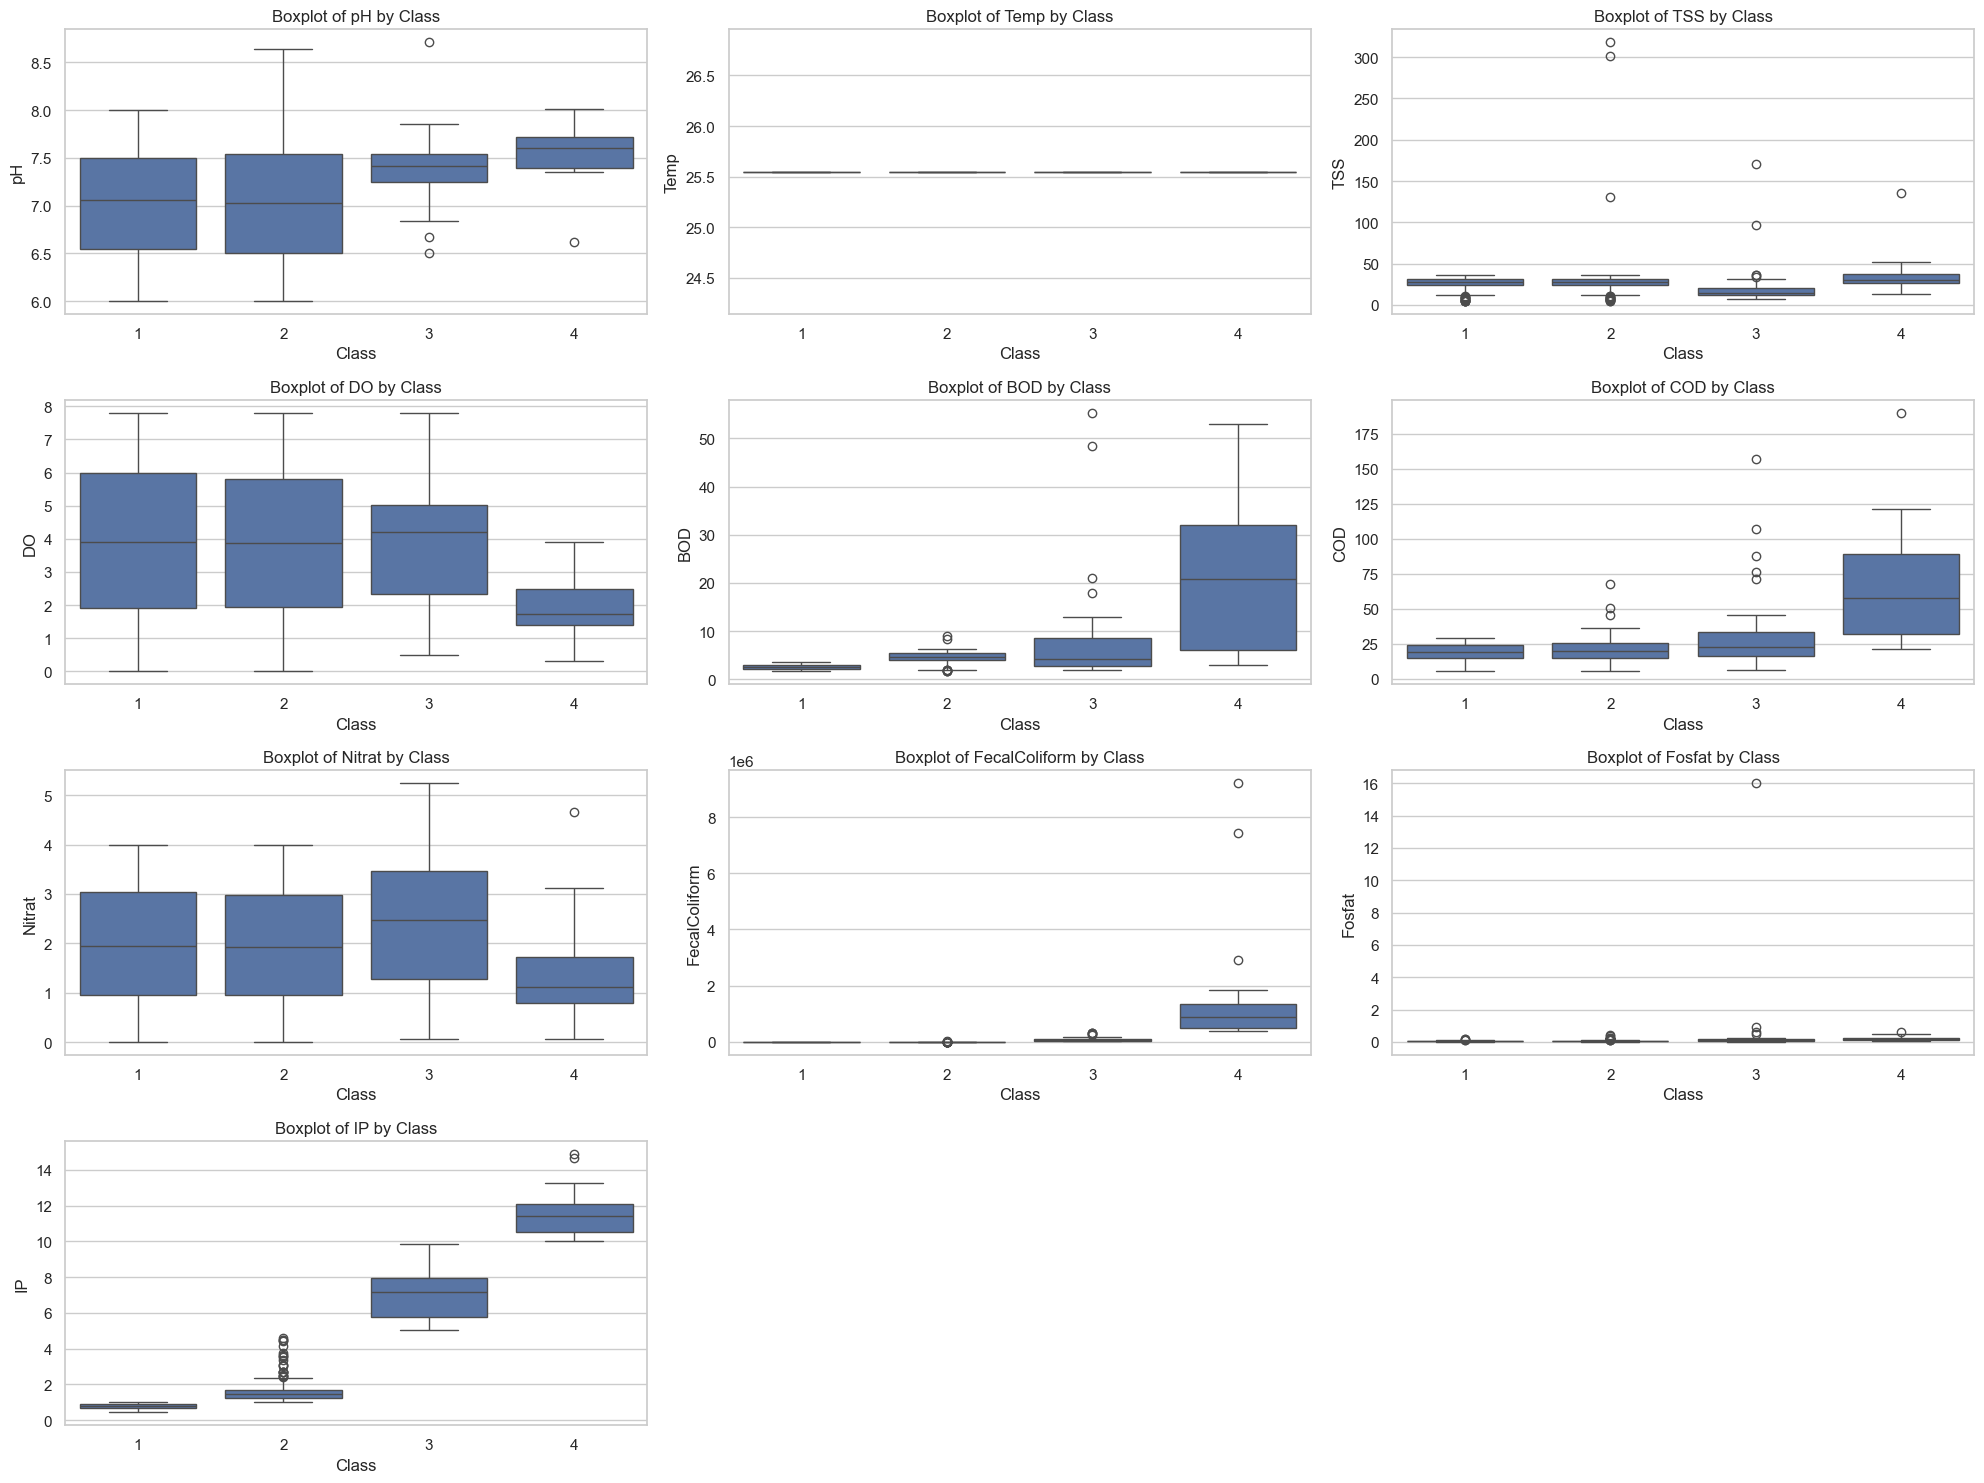

           pH                                                              \
        count      mean       std       min       25%       50%       75%   
Class                                                                       
1       948.0  7.025276  0.562735  6.002441  6.549696  7.057711  7.499760   
2      1496.0  7.021518  0.589083  6.002564  6.498352  7.030000  7.540864   
3        39.0  7.387949  0.370279  6.500000  7.250000  7.410000  7.540000   
4        17.0  7.557647  0.321899  6.620000  7.390000  7.600000  7.720000   

                   Temp         ...    Fosfat             IP             \
            max   count   mean  ...       75%    max   count       mean   
Class                           ...                                       
1      7.999573   948.0  25.55  ...  0.081503   0.16   948.0   0.782806   
2      8.640000  1496.0  25.55  ...  0.083108   0.40  1496.0   1.468924   
3      8.710000    39.0  25.55  ...  0.160000  16.00    39.0   7.126667   
4      8.0

In [45]:
sns.set(style="whitegrid")

features = ['pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
    plt.xlabel('Class')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


descriptive_stats = df.groupby('Class')[features].describe()
print(descriptive_stats)


Berdasarkan pada hasil boxplot bertujuan untuk mengetahui apakah semakin Classnya tinggi itu kualitas air itu semakin bagus apa semakin buruk. Dari berbagai faktor nilai fitur-fitur seperti 'pH', 'Temp', 'TSS', 'DO', 'BOD', 'COD', 'Nitrat', 'FecalColiform', 'Fosfat', 'IP' pada setiap Class 1 sampai Class 4,  dapat disimpulkan bahwa Class 1 itu merupakan Class untuk kualitas Air yang makin bagus, sedangkan Class 4 itu Kualitas Air semakin Buruk. Karena pada fitur seperi COD pada kelas 4 nilainya lebih tinggi yang berarti lebih banyak bahan organik yang teroksidasi daripada kelas-kelas lainnya.

## Visualisasi Confusion Matrix

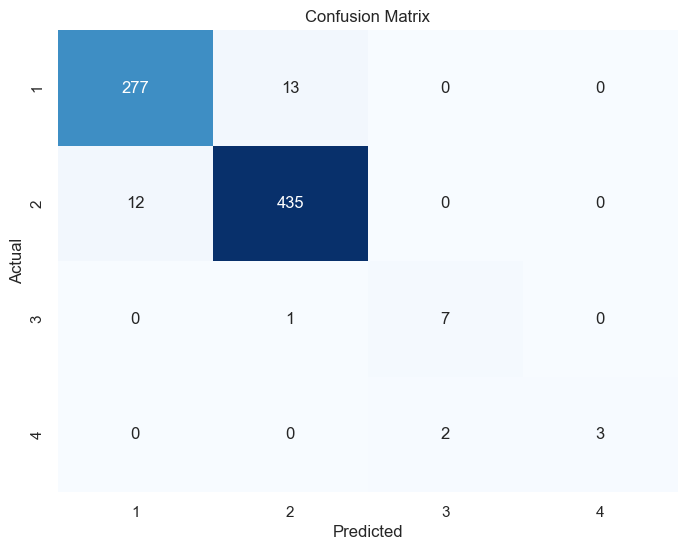

In [49]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))


plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Pada hasil Confusion Matrix terdapat:


Class 1 (Kualitas Air Sangat baik):

TP(True Positive): 277 (Prediksi benar ke class 1)

FP(False Positive) = 12 (Salah prediksi class 1, Actual Classnya ke class 2)

FN(False Negative) = 13 (Class 1 Actual Class salah prediksi, di prediksi sebagai Class 2)

TN(True Negative) = 445 (Benar Terprediksi bukan Class 1)



Class 2(Kualitas Air baik):

TP(True Positive): 435 (Prediksi benar ke class 2)

FP(False Positive) = 13 (Salah prediksi kelas 2, Actual Classnya ke kelas 1)

FN(False Negative) = 12 (Class 2 Actual Class salah prediksi, di prediksi sebagai Class 1)

TN(True Negative) = 280 (Benar Terprediksi bukan Class 2)



Class 3(Kualitas Air buruk):

TP(True Positive): 7 (Prediksi benar ke class 3)

FP(False Positive) = 0 

FN(False Negative) = 12 (Class 3 Actual Class salah prediksi, di prediksi sebagai Class 2)

TN(True Negative) = 728 (Benar Terprediksi bukan Class 3)



Class 4(Kualitas Air Sangat buruk):

TP(True Positive): 3 (Prediksi benar ke class 3)

FP(False Positive) = 2 (Salah prediksi kelas 4, Actual Classnya ke kelas 3)

FN(False Negative) = 0

TN(True Negative) = 726 (Benar Terprediksi bukan Class 4)


Dapat disimpulkan bahwa hasil Confusion Matrix tersebut paling banyak dapat TP nya adalah pada Class 2



 ## Accuracy Classification Report

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9626666666666667
Classification Report:
               precision    recall  f1-score   support

           1       0.96      0.96      0.96       290
           2       0.97      0.97      0.97       447
           3       0.78      0.88      0.82         8
           4       1.00      0.60      0.75         5

    accuracy                           0.96       750
   macro avg       0.93      0.85      0.88       750
weighted avg       0.96      0.96      0.96       750



Berdasarkan hasil akurasi dan hasil classfication tersebut dapat disimpulkan bahwa hasil model tersebut memiliki kinerja dan hasil yang sangat baik di akurasi 96,7%

## Plot ROC Curve and Calculate AUC

ROC AUC Score for class 0: Not applicable (only one class present or class not in y_test)
ROC AUC Score for class 1: 0.02
ROC AUC Score for class 2: 0.95
ROC AUC Score for class 3: 0.99
Macro ROC AUC Score: 1.00


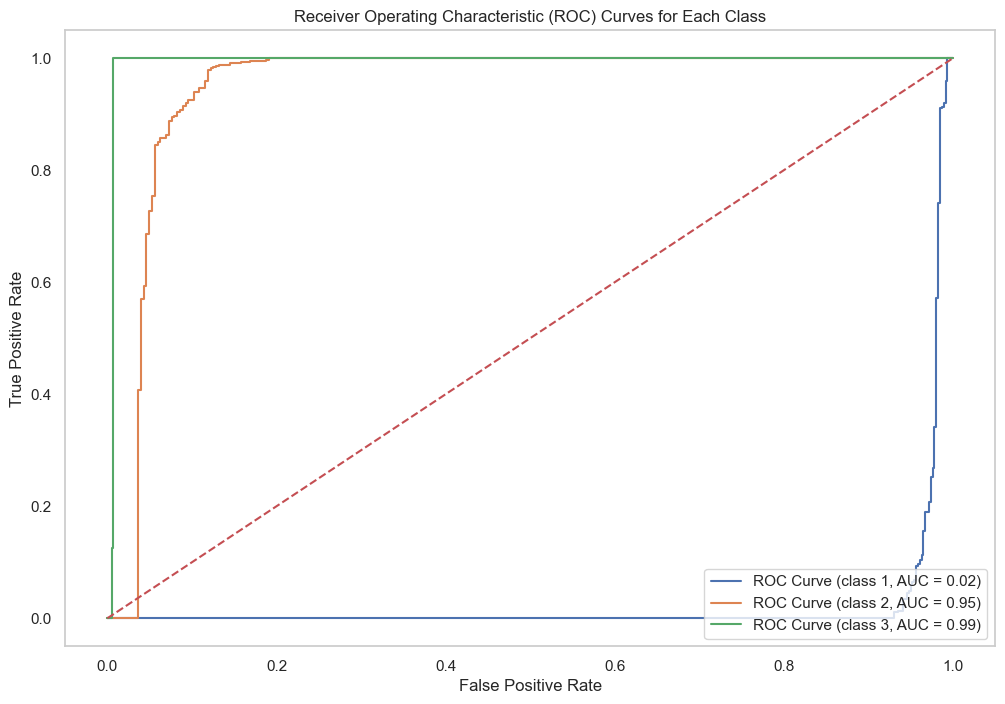

In [47]:
y_proba = logreg.predict_proba(X_test_scaled)

roc_auc_scores = {}

for i in range(y_proba.shape[1]):
  
    if len(set(y_test)) > 1:
      
        if (y_test == i).any():  
            roc_auc_scores[i] = roc_auc_score(y_test == i, y_proba[:, i])
        else:
            roc_auc_scores[i] = None  
    else:
        roc_auc_scores[i] = None  


for class_label, score in roc_auc_scores.items():
    if score is not None:
        print(f"ROC AUC Score for class {class_label}: {score:.2f}")
    else:
        print(f"ROC AUC Score for class {class_label}: Not applicable (only one class present or class not in y_test)")


if len(set(y_test)) > 1: 
    macro_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    print(f"Macro ROC AUC Score: {macro_auc:.2f}")
else:
    print("Macro ROC AUC Score: Not applicable (only one class present)")


plt.figure(figsize=(12, 8))
for i in range(y_proba.shape[1]):
    if roc_auc_scores[i] is not None: 
        fpr, tpr, thresholds = roc_curve(y_test == i, y_proba[:, i])  
        plt.plot(fpr, tpr, label=f'ROC Curve (class {i}, AUC = {roc_auc_scores[i]:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Pada hasil ROC dan AUC untuk evaluasi kinerja model klasifikasi antar multiclass, dapat disimpulkan pada Class 2 memiliki kinerja lebih baik dalam mengklasifikan positif ataupun negatif.